# Author : Nadia Helemish

GRIP @ The Sparks Foundation

Task 1 :Simple Linear Regression in this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied . This is a simple linear regression task as it involves just two variables (x:independent variable , y:dependent variable )

# Import Required Libraries

In [56]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sb
import matplotlib.pyplot as plt  
%matplotlib inline

# Import the dataset 

In [9]:
# Reading data from remote link
df = pd.read_csv("E:\SPARKS\Task 1\student_scores - student_scores.csv")

In [10]:
df  #we can also use df.head() to view the top 5 datasets and similarly df.tail () to view the bottom 5 datasets if the dataset is big. 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [59]:
df.head() # for viewing first five entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
df.tail(6) # for viewing last six entries

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Inspecting the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()  # show the statistical descrition of numerical dataset.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.shape

(25, 2)

# Spliting the data into "attributes" (inputs) and "labels"(outputs)

In [15]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [16]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

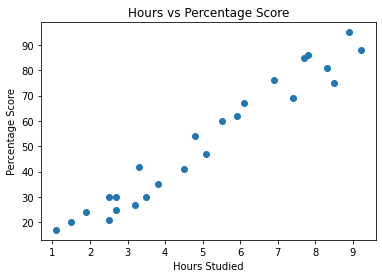

In [18]:
# Plotting the distribution of scores
plt.scatter(x,y)
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

C:\Users\AIT\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

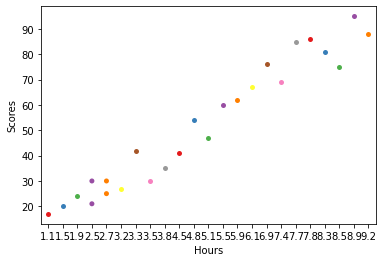

In [57]:
sb.swarmplot(x="Hours",y="Scores",data=df,palette="Set1",split=True)

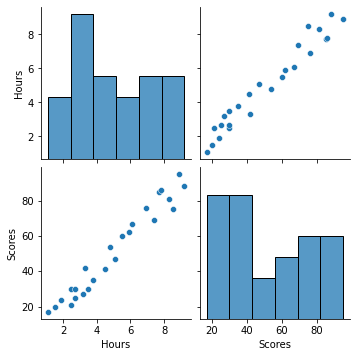

In [63]:
sb.pairplot(df)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Checking the relationship between Target(Hours) and feature(Scores)

Text(0, 0.5, 'Scores')

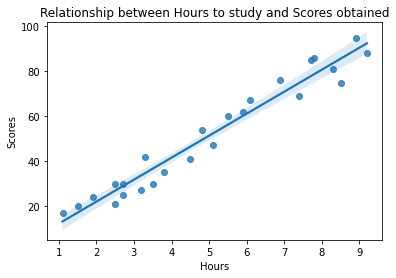

In [66]:
sb.regplot(x=df['Hours'],y=df['Scores'],data=df)
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Simple Linear Regression

In [79]:
# Dividing into dependent(y) and independent(X) variables
X = df['Hours']
y = df['Scores']

In [80]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
# Checking X_train
X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [82]:
# Checking y_train
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [83]:
# Building a Linear Model
import statsmodels.api as sm
     

In [84]:
# add constant to get intercept c
X_train_sm = sm.add_constant(X_train)
     

C:\Users\AIT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [86]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params
     

const    1.495142
Hours    9.871714
dtype: float64

In [87]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.15e-11
Time:                        14:40:36   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

C:\Users\AIT\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


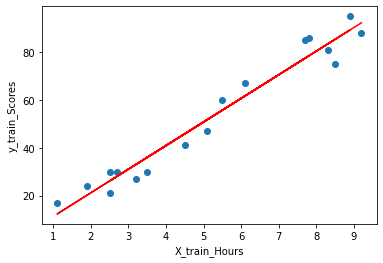

In [88]:
# Checking the nature of the training data set
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.5 + 9.87*X_train, 'r')
plt.xlabel("X_train_Hours")
plt.ylabel("y_train_Scores")
plt.show()

# Predictions on Test set

In [89]:
# Checking the test set
X_test

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8
Name: Hours, dtype: float64

In [90]:
# Insert asked value in the test data
X_test.loc[8]=9.25

In [92]:
# Checking the test set
X_test
     

9     2.70
22    3.80
13    3.30
11    5.90
5     1.50
19    7.40
23    6.90
21    4.80
8     9.25
Name: Hours, dtype: float64

In [93]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

C:\Users\AIT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [95]:

# Observing the predicted values
y_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
8     92.808501
dtype: float64

We have got our answer in the last row of the above dataset that is if a student studies for 9.25 hrs/day he/she scores 92.81%

# Model Evaluation

In [101]:
# libraries to find the r-squared score for test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
     

In [102]:
# Dropping the asked value to make the predicted data set of same shape as that of test data set
y_pred.drop(8, inplace=True)

In [103]:
# Finding out the value of Model evaluation metric i.e Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332273


We will use the metric R-squared value for Model Evaluation.

In [104]:
# Finding out the r-squared score for the test data compared to the predicted data to evaluate the model
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

It seems to be a very good model for prediction because both the training and testing data have good R-squared scores.

In [105]:
# Checking X_test data
X_test

9     2.70
22    3.80
13    3.30
11    5.90
5     1.50
19    7.40
23    6.90
21    4.80
8     9.25
Name: Hours, dtype: float64

In [106]:

# Checking y_test data
y_test

9     25
22    35
13    42
11    62
5     20
19    69
23    76
21    54
Name: Scores, dtype: int64

In [107]:
# Dropping the asked data to equalise the shape with the y_test data
X_test.drop(8,inplace=True)

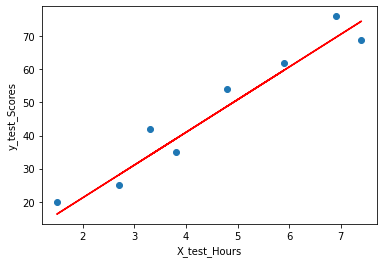

In [108]:
# Observing the nature of the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.5 + 9.87*X_test, 'r')
plt.xlabel("X_test_Hours") #x label
plt.ylabel("y_test_Scores") #y label
plt.show()

The nature of the test data also seems to be linearly increasing.

Student Score Data Analysis Conclusion:

The more number of hours a student studies the better he or she scores.

Any student who will study for 9.25 hrs/day will get 92.81% marks